## Import libraries

In [9]:
from data_loader import DataLoader
from kernels import IdentityKernel, GaussianKernel, PolynomialKernel
from gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
%matplotlib notebook

## Load data

In [10]:
dataset_root_directory = './regression-dataset'
full_dataset = DataLoader.load_full_dataset(dataset_root_directory)
print('%d subsets of %d training examples with true values' % (len(full_dataset), len(full_dataset[0][0])))
print('Total %d training examples and true values' % (len(full_dataset)*len(full_dataset[0][0])))

10 subsets of 20 training examples with true values
Total 200 training examples and true values


## Initialize parameters

In [11]:
input_vector_size = 2

## Train a model with Identity Kernel

In [12]:
kernel = IdentityKernel()
model = GaussianProcessRegressor(input_vector_degree=input_vector_size, kernel=kernel)
print('Training in progress using Identity Kernel')
model.learn(full_dataset, report_error=True)

Training in progress using Identity Kernel
Mean Square Error = 0.397 


## Train models with Gaussian Kernal and different hyperparameters

In [13]:
sigma_values = [sigma for sigma in range(1, 7, 1)]
MSE_errors = []

for sigma in sigma_values:
    kernel = GaussianKernel(sigma=sigma)
    print('Training in progress using Gaussian Kernel with sigma =', sigma)
    model = GaussianProcessRegressor(input_vector_degree=input_vector_size, kernel=kernel)
    model.learn(full_dataset, report_error=True)
    print()
    MSE_errors.append(model.mse_error)

Training in progress using Gaussian Kernel with sigma = 1
Mean Square Error = 0.062 

Training in progress using Gaussian Kernel with sigma = 2
Mean Square Error = 0.011 

Training in progress using Gaussian Kernel with sigma = 3
Mean Square Error = 0.007 

Training in progress using Gaussian Kernel with sigma = 4
Mean Square Error = 0.006 

Training in progress using Gaussian Kernel with sigma = 5
Mean Square Error = 0.007 

Training in progress using Gaussian Kernel with sigma = 6
Mean Square Error = 0.008 



## Plot Mean Square Error vs sigma

<IPython.core.display.Javascript object>


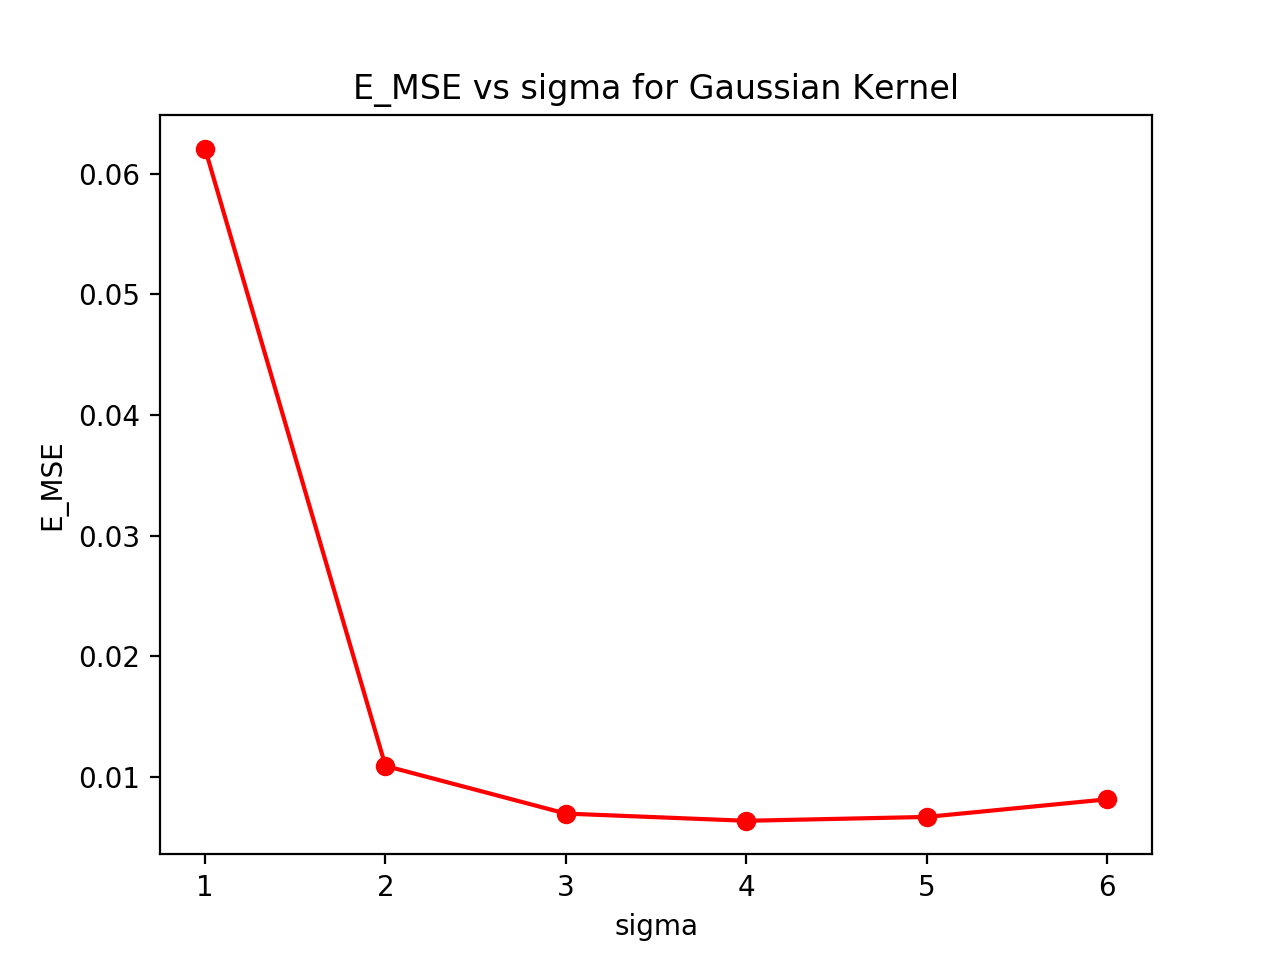

In [14]:
plt.plot(sigma_values, MSE_errors, '-o', c='r')
plt.xlabel('sigma')
plt.ylabel('E_MSE')
plt.title('E_MSE vs sigma for Gaussian Kernel')
plt.show()

## Train models with Polynomial Kernal and different hyperparameters

In [15]:
polynomial_kernel_degrees = [degree for degree in range(1, 5)]
MSE_errors = []

for degree in polynomial_kernel_degrees:
    kernel = PolynomialKernel(degree=degree)
    model = GaussianProcessRegressor(input_vector_degree=input_vector_size, kernel=kernel)
    print('Training in progress using Polynomial Kernel with degree =', degree)
    model.learn(full_dataset, report_error=True)
    print()
    MSE_errors.append(model.mse_error)

Training in progress using Polynomial Kernel with degree = 1
Mean Square Error = 0.144 

Training in progress using Polynomial Kernel with degree = 2
Mean Square Error = 0.104 

Training in progress using Polynomial Kernel with degree = 3
Mean Square Error = 0.007 

Training in progress using Polynomial Kernel with degree = 4
Mean Square Error = 0.006 



## Plot Mean Square Error vs degree

<IPython.core.display.Javascript object>


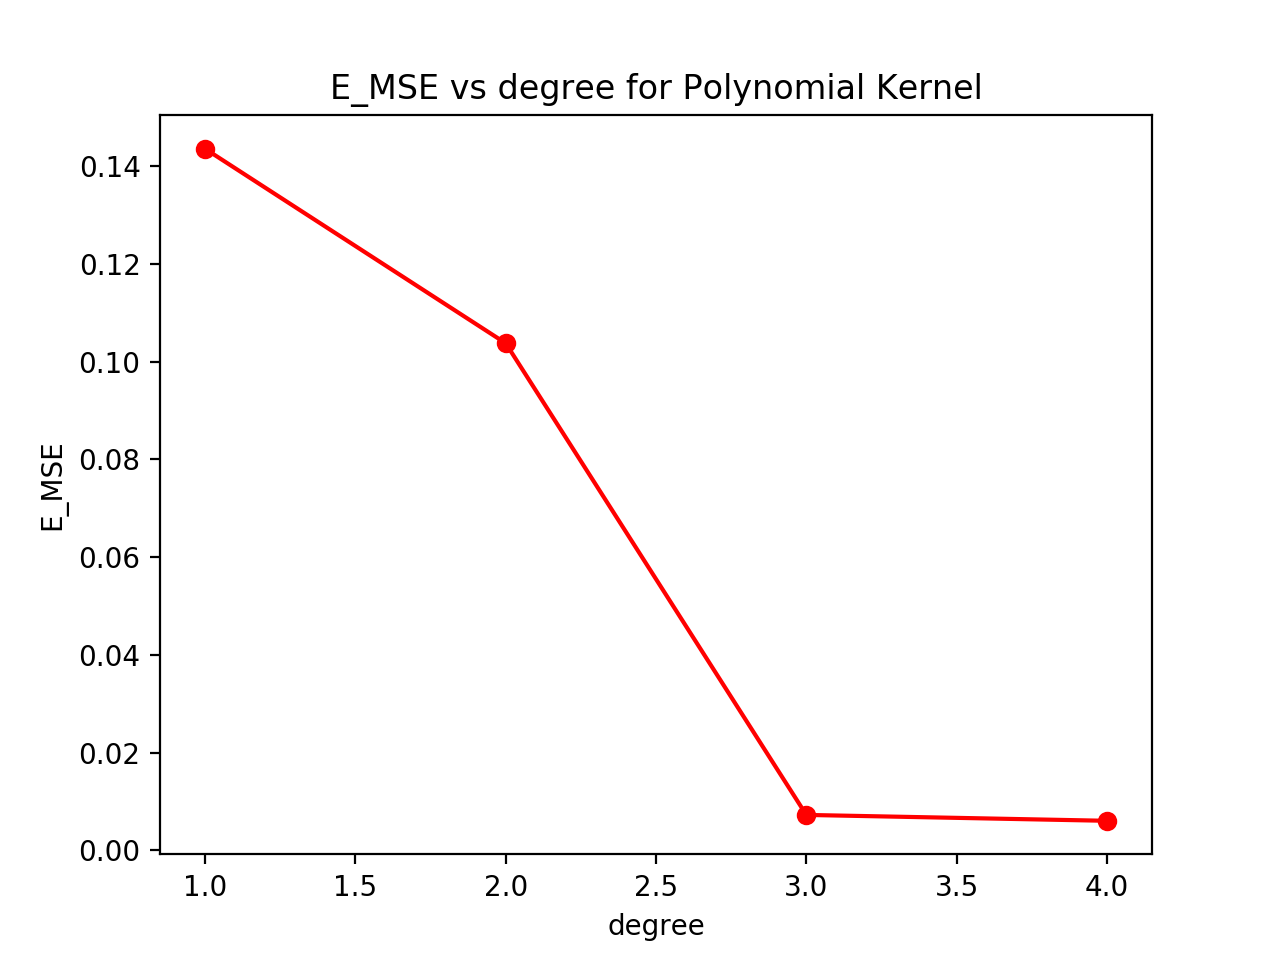

In [16]:
plt.plot(polynomial_kernel_degrees, MSE_errors, '-o', c='r')
plt.xlabel('degree')
plt.ylabel('E_MSE')
plt.title('E_MSE vs degree for Polynomial Kernel')
plt.show()